In [1]:
import pickle
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
import numpy as np

nltk.download('punkt')
nltk.download('wordnet')
from nltk.tokenize import word_tokenize

import json
import csv

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aligo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\aligo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
brands = [
  "latvenergo",
  "rimi",
  "maxima",
  "swedbank",
  "lmt",
  "tet",
  "lg",
  "tele2",
  "airbaltic",
  "olympic",
  "seb",
  "grindeks",
  "citadele",
  "bite",
  "drogas",
  "depo",
  "circlek",
  "lb",
  "optibet",
  "evolution",
];

In [3]:
allLabeledTweets = pd.read_csv('./../tweets/raw/allLabeledTweets.csv')
allLabeledTweets['label'] = allLabeledTweets['label'].astype(int)
allLabeledTweets['message'] = allLabeledTweets['message'].astype(str)
allLabeledTweets.head()

,message,id,tweetId,createdAt,language,inReplyToStatusId,inReplyToUserId,inReplyToScreenName,userId,userName,...,placeType,retweetedId,monitoringObjectId1,monitoringObjectId2,queryId,sentiment,retweetCount,label,clean_message,message_no_stopwords
0,Tiek vērtēti trīs potenciālie airBaltic invest...,1478404,925617390523732000,2017-11-01T08:55:57,lv,NaN,NaN,NaN,24855060,Dienas Bizness,...,NaN,NaN,389,389,NaN,0.0,0,0,tiek vērtēti trīs potenciālie airbaltic invest...,vērtēti trīs potenciālie airbaltic investori U...
1,"Vakardien, vēlu vakarā, ar svinīgu pasākumu ti...",1486476,924948828318511100,2017-10-30T12:39:20,lv,NaN,NaN,NaN,44849531,RIGA I Airport,...,NaN,NaN,703,703,NaN,-1.0,0,0,vakardien vēlu vakarā ar svinīgu pasākumu tika...,vakardien vēlu vakarā svinīgu pasākumu atklāts...
2,"Es ļoti ceru,ka potenciālie Air Baltic investo...",1488297,925794560420311000,2017-11-01T20:39:58,lv,NaN,NaN,NaN,218804015,Artis Pabriks,...,NaN,NaN,576,3,NaN,-1.0,9,2,es ļoti ceru ka potenciālie air baltic investo...,es ļoti ceru potenciālie air baltic investori ...
3,Ar kritisko domāšanu gan joprojām bēdīgi. Piln...,1489818,925045141018218500,2017-10-30T19:02:02,lv,NaN,NaN,NaN,21071644,Andris Rubīns,...,NaN,NaN,319,319,NaN,-1.0,3,2,ar kritisko domāšanu gan joprojām bēdīgi pilns...,kritisko domāšanu joprojām bēdīgi pilns facebo...
4,Latvijas lidsabiedrība airBaltic sadarbībā ar ...,1490250,925006964135952400,2017-10-30T16:30:20,lv,NaN,NaN,NaN,131562098,Latviesi.com,...,NaN,NaN,453,453,NaN,0.0,0,0,latvijas lidsabiedrība airbaltic sadarbībā ar ...,latvijas lidsabiedrība airbaltic sadarbībā apv...


In [4]:
allLabeledTweets["label"].value_counts()

0    253
2    136
1     87
Name: label, dtype: int64

In [17]:
# def getWordFrequencyWithoutBrands(processedTweetOutputFile):
#     tweets = pd.read_csv(processedTweetOutputFile)

#     allPostsConcat = ''
#     for tweet in tweets.message_no_stopwords:
#         if(type(tweet)==str):
#             allPostsConcat+=' '+ tweet

#     # create bag-of-words
#     all_words = []

#     words = word_tokenize(allPostsConcat)
#     words = [word for word in words if not word in brands]
#     for word in words:
#         if word!='``':
#             all_words.append(word)

#     all_words = nltk.FreqDist(all_words)
    
#     return all_words

In [18]:
# freqWordsWithoutBrands = getWordFrequencyWithoutBrands('./../tweets/raw/allLabeledTweets.csv')

# # print the total number of words and the 100 most common words
# print('Number of words: {}'.format(len(freqWordsWithoutBrands)))
# print('Most common words: {}'.format(freqWordsWithoutBrands.most_common(100)))

# word_features_without_brands = list(freqWordsWithoutBrands.keys())[:1500]

Number of words: 3851
Most common words: [('URL', 509), ('MENTION', 328), ('NMBR', 196), ('kas', 41), ('kopā', 40), ('latvijas', 39), ('vēl', 39), ('nav', 34), ('lieliskamūzika', 34), ('to', 28), ('lhf', 25), ('kopāspēks', 24), ('tiešraide', 24), ('spēli', 24), ('es', 22), ('tas', 22), ('šeit', 22), ('the', 20), ('lielfans', 19), ('tagad', 18), ('man', 17), ('šodien', 17), ('hokeja', 16), ('ļoti', 15), ('rīgas', 15), ('mūsu', 15), ('līgaskaties', 15), ('kad', 14), ('eiro', 14), ('gada', 13), ('izlase', 12), ('oik', 12), ('vairāk', 11), ('dienasbizness', 11), ('ielā', 11), ('tv', 11), ('kur', 10), ('darbinieku', 10), ('minūtēm', 10), ('latvija', 10), ('ko', 10), ('vietas', 9), ('varētu', 9), ('kāpēc', 9), ('kāds', 9), ('valsts', 9), ('lauvassirds', 9), ('paldies', 9), ('rīgā', 9), ('telpu', 9), ('darbu', 9), ('jaunajā', 9), ('nevar', 8), ('visu', 8), ('dblv', 8), ('bankas', 8), ('elektrības', 8), ('zālē', 8), ('neko', 7), ('kāda', 7), ('interesanti', 7), ('iespējams', 7), ('tiešām', 7),

In [8]:
with open('./../data/wordFeaturesWithoutBrands.data', 'rb') as filehandle:
        # read the data as binary data stream
        word_features_without_brands = pickle.load(filehandle)

print(word_features_without_brands)

['vērtēti', 'trīs', 'potenciālie', 'investori', 'URL', 'vakardien', 'vēlu', 'vakarā', 'svinīgu', 'pasākumu', 'atklāts', 'MENTION', 'tiešais', 'lidojums', 'rīgu', 'abū', 'dabī', 'ļoti', 'ceru', 'air', 'baltic', 'nav', 'kādi', 'kārtējie', 'slīpie', 'blakus', 'pagasta', 'kuri', 'slēpjas', 'nezināmiem', 'skanīgiem', 'vārdiem', 'kritisko', 'domāšanu', 'joprojām', 'bēdīgi', 'pilns', 'facebook', 'priecīgiem', 'biļešu', 'kārotājiem', 'diezgan', 'acīmredzamā', 'viltus', 'konkursā', 'latvijas', 'lidsabiedrība', 'sadarbībā', 'apvienoto', 'arābu', 'emirātu', 'nacionālo', 'lidsabiedrību', 'etihad', 'airways', 'uzs…', 'kas', 'tas', 'spamu', 'feisbukā', 'daudzi', 'uzķērušies', 'valdības', 'klusēšana', 'baumām', 'pārdošanu', 'aizdomīga', 'uzskatu', 'izcils', 'investors', 'valstij', 'jāpatur', 'šis', 'strat', 'uzņēmums', 'pacentīšos', 'izvairīties', 'mazajām', 'propelleru', 'lidmašīnām', 'kur', 'vietas', 'cilvēkiem', 'mantām', 'turklāt', 'autobusā', 'lidmašīnas', 'mana', 'pieredze', 'jāgaida', 'NMBR', 

In [9]:
# function to find features in every post
def find_features_no_brands(post):
    words = word_tokenize(post)
    features = {}
    for word in word_features_without_brands:
        features[word] = (word in words)
    return features

In [10]:
tweets_all = list(zip(allLabeledTweets.loc[:,"message_no_stopwords"].values,allLabeledTweets.loc[:,"label"].values))
featuresets = [(find_features_no_brands(text), label) for (text, label) in tweets_all]

from sklearn import model_selection

# split the data into training and testing datasets
seed = 1
training, testing = model_selection.train_test_split(featuresets, test_size = 0.1, random_state=seed)

print(len(allLabeledTweets))
print(len(training))
print(len(testing))

476
428
48


## Train

In [11]:
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.naive_bayes import MultinomialNB

nltk_model = SklearnClassifier(MultinomialNB())
nltk_model.train(training)
accuracy = nltk.classify.accuracy(nltk_model, testing)*100
print("{} Accuracy: {}".format("Naive Bayes", accuracy))

Naive Bayes Accuracy: 62.5


In [12]:
txt_features, labels = zip(*testing)

prediction = nltk_model.classify_many(txt_features)

In [13]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# print a confusion matrix and a classification report
print(classification_report(labels, prediction))

pd.DataFrame(
    confusion_matrix(labels, prediction),
index = [['actual', 'actual', 'actual'], ['neutral', 'positive', 'negative']],
    columns = [['predicted', 'predicted', 'predicted'], ['neutral', 'positive', 'negative']])

              precision    recall  f1-score   support

           0       0.65      0.87      0.74        23
           1       0.38      0.30      0.33        10
           2       0.78      0.47      0.58        15

    accuracy                           0.62        48
   macro avg       0.60      0.55      0.55        48
weighted avg       0.63      0.62      0.61        48



predicted                  
                  neutral positive negative
actual neutral         20        2        1
       positive         6        3        1
       negative         5        3        7

## Even labels

In [130]:
# allTweets = allLabeledTweets[['message_no_stopwords', 'label']]
# allTweets.head()

,message_no_stopwords,label
0,vērtēti trīs potenciālie airbaltic investori U...,0
1,vakardien vēlu vakarā svinīgu pasākumu atklāts...,0
2,es ļoti ceruka potenciālie air baltic investor...,2
3,kritisko domāšanu joprojām bēdīgi pilns facebo...,2
4,latvijas lidsabiedrība airbaltic sadarbībā apv...,0


In [16]:
train_df, test_df = model_selection.train_test_split(allLabeledTweets, test_size=0.1)
train_df.shape, test_df.shape

((428, 24), (48, 24))

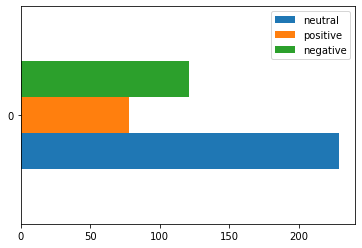

In [17]:
train_neutral = train_df[train_df["label"] == 0]
train_positive = train_df[train_df["label"] == 1]
train_negative = train_df[train_df["label"] == 2]

pd.DataFrame(dict(
  neutral=[len(train_neutral)],
  positive=[len(train_positive)],
  negative=[len(train_negative)]  
)).plot(kind='barh');

In [19]:
train_df = pd.concat([
    train_neutral.sample(60),
    train_positive,
    train_negative.sample(60)])

train_df.shape, test_df.shape

((198, 24), (48, 24))

In [20]:
tweets_train = list(zip(train_df.loc[:,"message_no_stopwords"].values,train_df.loc[:,"label"].values))
featuresets_train = [(find_features_no_brands(text), label) for (text, label) in tweets_train]

In [21]:
tweets_test = list(zip(test_df.loc[:,"message_no_stopwords"].values,test_df.loc[:,"label"].values))
featuresets_test = [(find_features_no_brands(text), label) for (text, label) in tweets_test]

In [22]:
nltk_model = SklearnClassifier(MultinomialNB())
nltk_model.train(featuresets_test)
accuracy = nltk.classify.accuracy(nltk_model, featuresets_test)*100
print("{} Accuracy: {}".format("Naive Bayes", accuracy))

Naive Bayes Accuracy: 87.5


In [23]:
txt_features, labels = zip(*featuresets_test)

prediction = nltk_model.classify_many(txt_features)
# print a confusion matrix and a classification report
print(classification_report(labels, prediction))

pd.DataFrame(
    confusion_matrix(labels, prediction),
index = [['actual', 'actual', 'actual'], ['neutral', 'positive', 'negative']],
    columns = [['predicted', 'predicted', 'predicted'], ['neutral', 'positive', 'negative']])

              precision    recall  f1-score   support

           0       0.80      1.00      0.89        24
           1       1.00      0.78      0.88         9
           2       1.00      0.73      0.85        15

    accuracy                           0.88        48
   macro avg       0.93      0.84      0.87        48
weighted avg       0.90      0.88      0.87        48



predicted                  
                  neutral positive negative
actual neutral         24        0        0
       positive         2        7        0
       negative         4        0       11

In [24]:
# save the model
filename = './nb_tweet_classifier.sav'
pickle.dump(nltk_model, open(filename, 'wb'))